# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Womenker Karto     [Github](https://github.com/wkarto/web-scraping),

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

## Question 1:

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [36]:
import requests
import pickle

# URL of the article
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"

# Send HTTP GET request
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    html_content = response.text

    # Save HTML to a .pkl file
    with open("laser_headlights_article.pkl", "wb") as file:
        pickle.dump(html_content, file)
    print("HTML content successfully saved to 'laser_headlights_article.pkl'")
else:
    print(f"Failed to fetch article. Status code: {response.status_code}")


HTML content successfully saved to 'laser_headlights_article.pkl'


## Question 2:

2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [37]:
import pickle
from bs4 import BeautifulSoup

# Load HTML content from the .pkl file
with open("laser_headlights_article.pkl", "rb") as file:
    html_content = pickle.load(file)

# Parse the HTML with BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Extract and print the text content
article_text = soup.get_text()
print(article_text[:1500])  # Print only the first 1500 characters to avoid clutter


















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype 

## Question 3

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [38]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text with spaCy
doc = nlp(article_text)

# Extract clean, lowercase tokens
tokens = [
    token.text.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
most_common_tokens = token_freq.most_common(5)

# Print results
print("Top 5 Most Frequent Tokens:")
for i, (token, freq) in enumerate(most_common_tokens, start=1):
    print(f"{i}. Token: '{token}' — Frequency: {freq}")


Top 5 Most Frequent Tokens:
1. Token: 'comment' — Frequency: 136
2. Token: 'march' — Frequency: 133
3. Token: '2021' — Frequency: 133
4. Token: 'says' — Frequency: 132
5. Token: 'report' — Frequency: 130


## Question 4:

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [39]:
import spacy
from collections import Counter

# Load the spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Extract clean, lowercase lemmas
lemmas = [
    token.lemma_.lower()
    for token in doc
    if not token.is_stop and not token.is_punct and not token.is_space
]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get top 5 most common lemmas
most_common_lemmas = lemma_freq.most_common(5)

# Print results
print("Top 5 Most Frequent Lemmas:")
for i, (lemma, freq) in enumerate(most_common_lemmas, start=1):
    print(f"{i}. Lemma: '{lemma}' — Frequency: {freq}")


Top 5 Most Frequent Lemmas:
1. Lemma: 'comment' — Frequency: 157
2. Lemma: 'say' — Frequency: 134
3. Lemma: 'march' — Frequency: 133
4. Lemma: '2021' — Frequency: 133
5. Lemma: 'report' — Frequency: 130


## Question 5:

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [40]:
# Function to score sentence by token match
def score_sentence_by_token(sentence, interesting_tokens):
    doc = nlp(sentence)
    tokens = [
        token.text.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    if len(tokens) == 0:
        return 0.0
    match_count = sum(token in interesting_tokens for token in tokens)
    return match_count / len(tokens)

# Function to score sentence by lemma match
def score_sentence_by_lemma(sentence, interesting_lemmas):
    doc = nlp(sentence)
    lemmas = [
        token.lemma_.lower()
        for token in doc
        if not token.is_stop and not token.is_punct and not token.is_space
    ]
    if len(lemmas) == 0:
        return 0.0
    match_count = sum(lemma in interesting_lemmas for lemma in lemmas)
    return match_count / len(lemmas)


# Get the first sentence from the article
doc = nlp(article_text)
first_sentence = list(doc.sents)[0].text
print("First sentence of the article:")
print(first_sentence)

# Prepare token and lemma lists (from earlier questions)
interesting_tokens = [token for token, freq in most_common_tokens]
interesting_lemmas = [lemma for lemma, freq in most_common_lemmas]

# Test scoring functions
token_score = score_sentence_by_token(first_sentence, interesting_tokens)
lemma_score = score_sentence_by_lemma(first_sentence, interesting_lemmas)

print("\nScoring Results:")
print(f"Token Score: {token_score:.4f}")
print(f"Lemma Score: {lemma_score:.4f}")


First sentence of the article:
















How Laser Headlights Work | Hackaday






































































Skip to content






Hackaday


Primary Menu

Home
Blog
Hackaday.io
Tindie
Hackaday Prize
Submit
About


Search for:



 March 27, 2021 






How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.

Scoring Results:
Token Score: 0.1220
Lemma Score: 0.1463


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

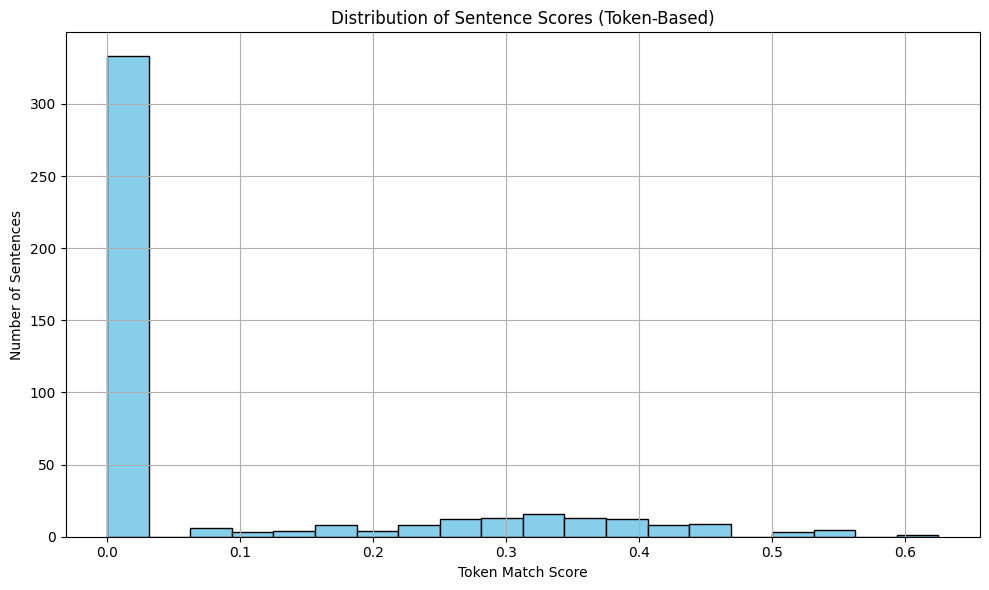

In [41]:
import matplotlib.pyplot as plt

# Get all sentences from the article
doc = nlp(article_text)
sentences = list(doc.sents)

# Score each sentence using token-based scoring
token_scores = [score_sentence_by_token(sent.text, interesting_tokens) for sent in sentences]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(token_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Sentence Scores (Token-Based)")
plt.xlabel("Token Match Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()


# Most common range appears to be between 0.0 and 0.1


7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

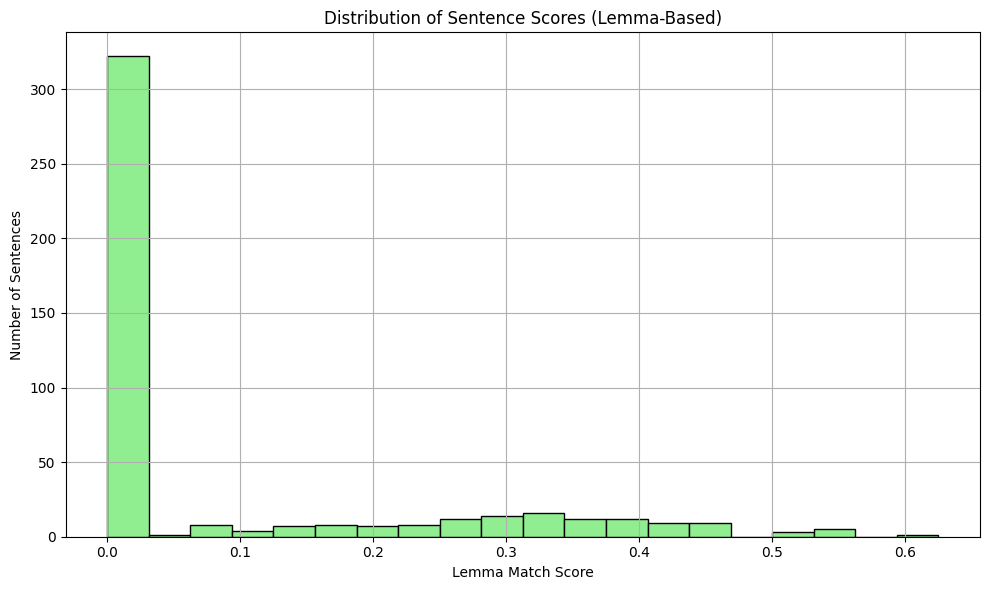

In [42]:
# Score each sentence using lemma-based scoring
lemma_scores = [score_sentence_by_lemma(sent.text, interesting_lemmas) for sent in sentences]

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=20, color='lightgreen', edgecolor='black')
plt.title("Distribution of Sentence Scores (Lemma-Based)")
plt.xlabel("Lemma Match Score")
plt.ylabel("Number of Sentences")
plt.grid(True)
plt.tight_layout()
plt.show()

# Most common range appears to be between 0.0 and 0.1


8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).